In [28]:
from shapely.geometry import Point, Polygon
from shapely.geometry import LineString, MultiLineString
import geopandas as gpd
import matplotlib.pyplot as plt

# Point is inside a polygon

In [2]:
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

In [3]:
coords = [(24.950899, 60.169158), (24.953492, 60.169158), 
          (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [4]:
p1.within(poly)

True

In [5]:
p2.within(poly)

False

In [7]:
print(p1, poly.centroid)

POINT (24.952242 60.1696017) POINT (24.95224242849236 60.16960179038188)


In [8]:
poly.contains(p1)

True

In [9]:
poly.contains(p2)

False

# Intersect

In [11]:
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [12]:
line_a.intersects(line_b)

True

In [13]:
line_a.touches(line_b)

True

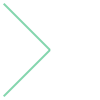

In [14]:
multi_line = MultiLineString([line_a, line_b])
multi_line

In [16]:
line_a.touches(line_a)

False

In [17]:
line_a.intersects(line_a)

True

# Point in Polygon using Geopandas

In [19]:
fp = 'L3_data/addresses.shp'
data = gpd.read_file(fp)

data.head()

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93169 60.16902)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
3,"Hermannin rantatie, Kyläsaari, Hermanni, Helsi...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97193 60.19700)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


In [20]:
gpd.io.file.fiona.drvsupport.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [21]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [22]:
gpd.io.file.fiona.drvsupport.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r',
 'KML': 'rw'}

In [23]:
fp = 'L3_data/PKS_suuralue.kml'
polys = gpd.read_file(fp, driver='KML')

In [24]:
polys.head()

,Name,Description,geometry
0,Suur-Espoonlahti,,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766..."
1,Suur-Kauklahti,,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155..."
2,Vanha-Espoo,,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752..."
3,Pohjois-Espoo,,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699..."
4,Suur-Matinkylä,,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537..."


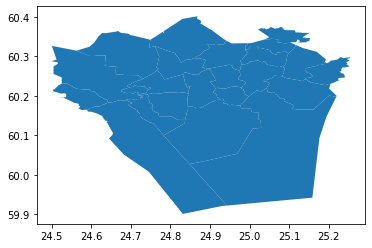

In [25]:
polys.plot();

In [26]:
southern = polys.loc[polys['Name']=='Eteläinen']
southern.reset_index(drop=True, inplace=True)
southern.head()

,Name,Description,geometry
0,Eteläinen,,"POLYGON Z ((24.78277 60.09997 0.00000, 24.8197..."


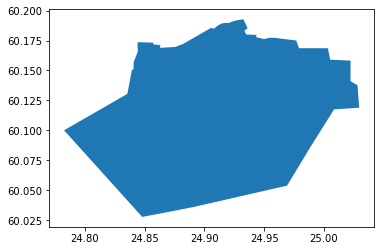

In [27]:
southern.plot();

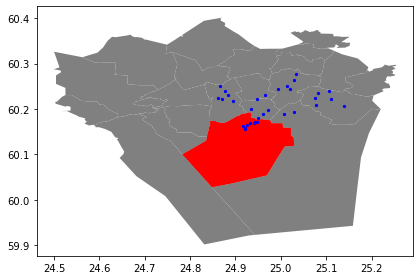

In [29]:
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray')
southern.plot(ax=ax, facecolor='red')
data.plot(ax=ax, color='blue', markersize=5)
plt.tight_layout()

In [30]:
from shapely import speedups
speedups.enabled

True

In [34]:
pip_mask = data.within(southern.loc[0, 'geometry'])
pip_mask

0      True
1      True
2      True
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
dtype: bool

In [35]:
pip_data = data.loc[pip_mask]
pip_data

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93169 60.16902)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)
10,"Rautatientori, Keskusta, Kluuvi, Eteläinen suu...",1011,"Rautatientori 1, 00100 Helsinki, Finland",POINT (24.94410 60.17133)
30,"Kampin keskus, 1, Urho Kekkosen katu, Kamppi, ...",1031,"Urho Kekkosen katu 1, 00100 Helsinki, Finland",POINT (24.93312 60.16909)
31,"Ruoholahdenkatu, Hietalahti, Kamppi, Eteläinen...",1032,"Ruoholahdenkatu 17, 00101 Helsinki, Finland",POINT (24.92520 60.16489)
32,"3, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",1033,"Tyynenmerenkatu 3, 00220 Helsinki, Finland",POINT (24.92121 60.15878)
33,"Oluthuone Kaisla, 4, Vilhonkatu, Keskusta, Klu...",1034,"Vilhonkatu 4, 00101 Helsinki, Finland",POINT (24.94709 60.17191)


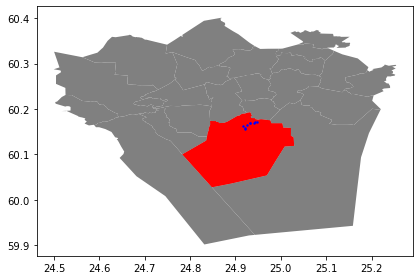

In [36]:
fig, ax = plt.subplots()

polys.plot(ax=ax, facecolor='gray')
southern.plot(ax=ax, facecolor='red')
pip_data.plot(ax=ax, color='blue', markersize=2)

plt.tight_layout()